In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
from matplotlib import pyplot as plt
data = pd.read_csv("data.csv")
display(data.head(n=5))

,Gate Entry No,Truck No,Invoice No,In Date,In Time,Out Date,Out Time,Total,MGP-MGN,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX,User
0,6.100008e+09,MH04GR4204,9.512100e+09,01-06-18,0:30,01-06-18,17:58,17:28,:01,:22,:42,13:07,3:13,4:13,2:09,SECOPR1
1,6.100009e+09,GJ06ZZ2991,9.911113e+09,01-06-18,0:36,01-06-18,17:43,17:06,:01,:24,:39,12:18,2:24,2:31,3:35,SECOPR1
2,6.100008e+09,UP78CT9018,9.511100e+09,01-06-18,1:20,02-06-18,0:23,23:03,:01,:10,:07,19:08,9:13,9:22,3:21,SECOPR1
3,2.000024e+08,GJ12X2470,9.524102e+09,01-06-18,5:59,01-06-18,13:24,7:25,:01,1:08,1:35,3:03,NaN,NaN,:46,SECOPR1
4,2.000024e+08,GJ12X1146,9.524102e+09,01-06-18,6:01,01-06-18,13:41,7:40,:01,1:13,1:34,2:46,NaN,NaN,:36,SECOPR1


In [2]:
# Working with the target variable
y = data['Total']
display(y.head(n=6))

0    17:28
1    17:06
2    23:03
3     7:25
4     7:40
5     7:41
Name: Total, dtype: object

In [3]:
y.isnull().values.any()

False

In [4]:
X = data.drop(['Invoice No', 'User', 'Out Time', 'In Date', 'Out Date', 'Total', 'MGP-MGN'], axis = 1)
display(X.head(n = 5))
X['MGN-WBT'] = X['MGN-WBT'].fillna("0")
X.shape
#X["LDG/UNLDG-WBG"].isnull().values.any()

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,6.100008e+09,MH04GR4204,0:30,:22,:42,13:07,3:13,4:13,2:09
1,6.100009e+09,GJ06ZZ2991,0:36,:24,:39,12:18,2:24,2:31,3:35
2,6.100008e+09,UP78CT9018,1:20,:10,:07,19:08,9:13,9:22,3:21
3,2.000024e+08,GJ12X2470,5:59,1:08,1:35,3:03,NaN,NaN,:46
4,2.000024e+08,GJ12X1146,6:01,1:13,1:34,2:46,NaN,NaN,:36


(2110, 9)

In [5]:
X['MGN-WBT'].isnull().values.any()

False

In [6]:
X = X.drop(X.index[-1])
y = y.drop(y.index[-1])
def g(x):
    if x.startswith(":"):
        return x.replace(":", "0:")
    else:
        return x

X['MGN-WBT'] = X['MGN-WBT'].apply(lambda x: g(str(x)))
X['WBT-DOC'] = X['WBT-DOC'].apply(lambda x: g(str(x)))
X['DOC-LDG/UNLDG'] = X['DOC-LDG/UNLDG'].apply(lambda x: g(str(x)))
X['LDG/UNLDG-WBG'] = X['LDG/UNLDG-WBG'].apply(lambda x: g(str(x)))
X['WBG-INV'] = X['WBG-INV'].apply(lambda x: g(str(x)))
X['INV-MGX'] = X['INV-MGX'].apply(lambda x: g(str(x)))
display(X.head(n=5))
X.shape

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,6.100008e+09,MH04GR4204,0:30,0:22,0:42,13:07,3:13,4:13,2:09
1,6.100009e+09,GJ06ZZ2991,0:36,0:24,0:39,12:18,2:24,2:31,3:35
2,6.100008e+09,UP78CT9018,1:20,0:10,0:07,19:08,9:13,9:22,3:21
3,2.000024e+08,GJ12X2470,5:59,1:08,1:35,3:03,nan,nan,0:46
4,2.000024e+08,GJ12X1146,6:01,1:13,1:34,2:46,nan,nan,0:36


(2109, 9)

In [7]:
X['Truck No'] = X['Truck No'].apply(lambda x: x[:2] )
X['In Time'] = X["In Time"].apply(lambda x: x.split(':'))
#X['MGP-MGN'] = X["MGP-MGN"].apply(lambda x: x.split(':'))
X['MGN-WBT'] = X['WBT-DOC'].apply(lambda x: x.split(':'))
X['WBT-DOC'] = X['WBT-DOC'].apply(lambda x: x.split(':'))
X['DOC-LDG/UNLDG'] = X['DOC-LDG/UNLDG'].apply(lambda x: x.split(':'))
X['LDG/UNLDG-WBG'] = X['LDG/UNLDG-WBG'].apply(lambda x: x.split(':'))
X['WBG-INV'] = X['WBG-INV'].apply(lambda x: x.split(':'))
X['INV-MGX'] = X['INV-MGX'].apply(lambda x: x.split(':'))


display(X.head(n=5))

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,6.100008e+09,MH,"[0, 30]","[0, 42]","[0, 42]","[13, 07]","[3, 13]","[4, 13]","[2, 09]"
1,6.100009e+09,GJ,"[0, 36]","[0, 39]","[0, 39]","[12, 18]","[2, 24]","[2, 31]","[3, 35]"
2,6.100008e+09,UP,"[1, 20]","[0, 07]","[0, 07]","[19, 08]","[9, 13]","[9, 22]","[3, 21]"
3,2.000024e+08,GJ,"[5, 59]","[1, 35]","[1, 35]","[3, 03]",[nan],[nan],"[0, 46]"
4,2.000024e+08,GJ,"[6, 01]","[1, 34]","[1, 34]","[2, 46]",[nan],[nan],"[0, 36]"


In [8]:
X["In Time"] = X["In Time"].apply(lambda x: int(int(x[0])*60 + int(x[1])))
display(X.head(n=5))

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,6.100008e+09,MH,30,"[0, 42]","[0, 42]","[13, 07]","[3, 13]","[4, 13]","[2, 09]"
1,6.100009e+09,GJ,36,"[0, 39]","[0, 39]","[12, 18]","[2, 24]","[2, 31]","[3, 35]"
2,6.100008e+09,UP,80,"[0, 07]","[0, 07]","[19, 08]","[9, 13]","[9, 22]","[3, 21]"
3,2.000024e+08,GJ,359,"[1, 35]","[1, 35]","[3, 03]",[nan],[nan],"[0, 46]"
4,2.000024e+08,GJ,361,"[1, 34]","[1, 34]","[2, 46]",[nan],[nan],"[0, 36]"


In [9]:
def k(x):
    if x[0] != 'nan':
        if x[0] == 0:
            return int(x[1])
        else:
            return int(x[0])*60 + int(x[1])       
    else:
        return None

X["MGN-WBT"] = X["MGN-WBT"].apply(lambda x: k(x))
X["WBT-DOC"] = X["WBT-DOC"].apply(lambda x: k(x))
X["DOC-LDG/UNLDG"] = X["DOC-LDG/UNLDG"].apply(lambda x: k(x))
X["LDG/UNLDG-WBG"] = X["LDG/UNLDG-WBG"].apply(lambda x: k(x))
X["WBG-INV"] = X["WBG-INV"].apply(lambda x: k(x))
X["INV-MGX"] = X["INV-MGX"].apply(lambda x: k(x))

In [10]:
X.head(5)

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,6.100008e+09,MH,30,42.0,42.0,787.0,193.0,253.0,129.0
1,6.100009e+09,GJ,36,39.0,39.0,738.0,144.0,151.0,215.0
2,6.100008e+09,UP,80,7.0,7.0,1148.0,553.0,562.0,201.0
3,2.000024e+08,GJ,359,95.0,95.0,183.0,NaN,NaN,46.0
4,2.000024e+08,GJ,361,94.0,94.0,166.0,NaN,NaN,36.0


In [11]:
mean_MGN_WBT = X['MGN-WBT'].mean(skipna=True)
mean_WBT_DOC = X['MGN-WBT'].mean(skipna=True)
mean_DOC_LDG_UNLDG = X['MGN-WBT'].mean(skipna=True)
mean_LDG_UNLDG_WBG = X['MGN-WBT'].mean(skipna=True)
mean_WBG_INV = X['MGN-WBT'].mean(skipna=True)
mean_INV_MGX = X['MGN-WBT'].mean(skipna=True)

In [12]:
X["MGN-WBT"] = X["MGN-WBT"].fillna(mean_MGN_WBT)
X["WBT-DOC"] = X["WBT-DOC"].fillna(mean_MGN_WBT)
X["DOC-LDG/UNLDG"] = X["DOC-LDG/UNLDG"].fillna(mean_MGN_WBT)
X["WBG-INV"] = X["WBG-INV"].fillna(mean_MGN_WBT)
X["INV-MGX"] = X["INV-MGX"].fillna(mean_MGN_WBT)
X["LDG/UNLDG-WBG"] = X["LDG/UNLDG-WBG"].fillna(mean_MGN_WBT)
display(X.head(n=5))

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,6.100008e+09,MH,30,42.0,42.0,787.0,193.000000,253.000000,129.0
1,6.100009e+09,GJ,36,39.0,39.0,738.0,144.000000,151.000000,215.0
2,6.100008e+09,UP,80,7.0,7.0,1148.0,553.000000,562.000000,201.0
3,2.000024e+08,GJ,359,95.0,95.0,183.0,60.875239,60.875239,46.0
4,2.000024e+08,GJ,361,94.0,94.0,166.0,60.875239,60.875239,36.0


In [13]:
 y= y.apply(lambda x: x.split(':'))
def j(x):
    if x[0] != 'nan' and x[0] != '' :
        if x[0] == 0:
            return int(x[1])
        else:
            return int(x[0])*60 + int(x[1])       
    else:
        return None
y = y.apply(lambda x: j(x))
y.head(5)

0    1048.0
1    1026.0
2    1383.0
3     445.0
4     460.0
Name: Total, dtype: float64

In [14]:
X_new = X.drop(['Truck No', 'Gate Entry No'], axis = 1)

In [15]:
from sklearn.decomposition import PCA
X_final = np.array(X_new)
y_final = np.array(y)

In [16]:
pca = PCA()
pca.fit(X_final)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[3.22323593e-01 2.61067003e-01 1.70733092e-01 1.25281196e-01
 1.05325640e-01 1.52694757e-02 7.97969856e-33]


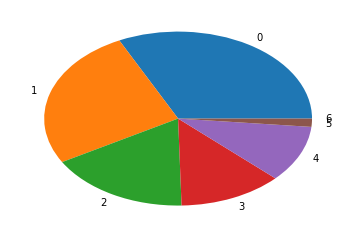

In [18]:
#labels = ['In Time', 'MGN_WBT', 'WBT-DOC', 'DOC-LDG/UNLDG', 'LDG/UNLDG-WBG', 'WBG-INV', "INV-MGX"]
sizes = var_ratio
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = np.arange(7))
plt.show()

Text(0,0.5,'Samples')

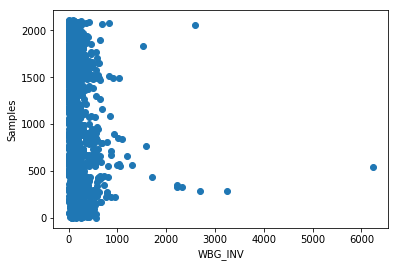

In [19]:
plt.scatter(X['WBG-INV'], np.arange(X.shape[0]))
plt.xlabel("WBG_INV")
plt.ylabel("Samples")

In [20]:
def pca_results(good_data, pca):
	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

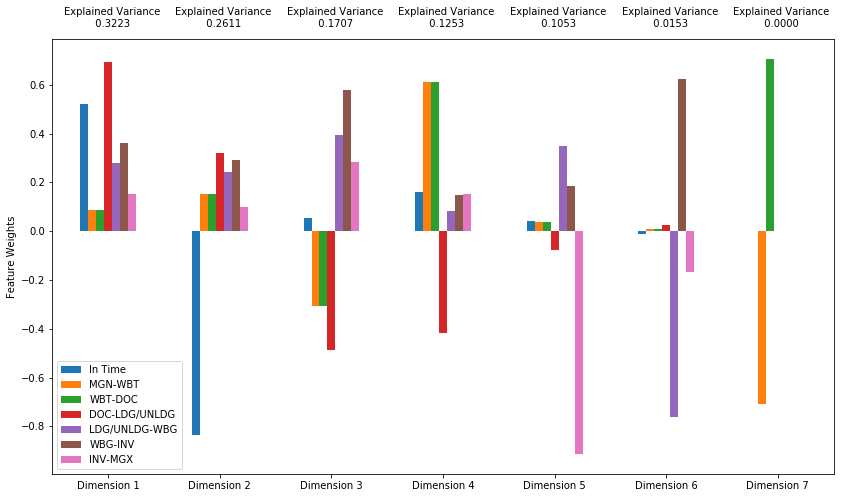

In [21]:
pca_results = pca_results(X_new, pca)

In [22]:
truck_no_unique = X["Truck No"].value_counts()
print(truck_no_unique)
truck_no_unique.shape

GJ    1042
HR     288
TN     176
MH     165
RJ     150
UP      87
NL      43
KA      39
PB      33
MP      25
WB      19
CG      15
DN       9
OR       8
AP       6
OD       3
TS       1
Name: Truck No, dtype: int64


(17,)

(array([12.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.000e+00, 1.051e+02, 2.092e+02, 3.133e+02, 4.174e+02, 5.215e+02,
        6.256e+02, 7.297e+02, 8.338e+02, 9.379e+02, 1.042e+03]),
 <a list of 10 Patch objects>)

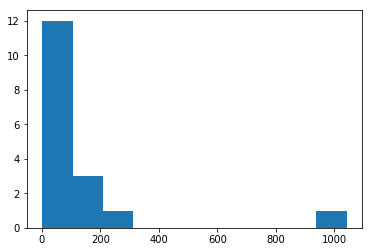

In [23]:
plt.hist(truck_no_unique)

In [24]:
def h(x):
    x = int(x)
    if x>0 and x<360:
        return 1
    if x>=360 and x<720:
        return 2
    if x>=720 and x<1080:
        return 3
    if x>=1080 and x<1440:
        return 4
X_new.head()

,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,30,42.0,42.0,787.0,193.000000,253.000000,129.0
1,36,39.0,39.0,738.0,144.000000,151.000000,215.0
2,80,7.0,7.0,1148.0,553.000000,562.000000,201.0
3,359,95.0,95.0,183.0,60.875239,60.875239,46.0
4,361,94.0,94.0,166.0,60.875239,60.875239,36.0


In [25]:
X_new_zones = X_new
X_new_zones["In Time"] = X_new["In Time"].apply(lambda x: h(x))

In [26]:
X_new_zones.head()

,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,1,42.0,42.0,787.0,193.000000,253.000000,129.0
1,1,39.0,39.0,738.0,144.000000,151.000000,215.0
2,1,7.0,7.0,1148.0,553.000000,562.000000,201.0
3,1,95.0,95.0,183.0,60.875239,60.875239,46.0
4,2,94.0,94.0,166.0,60.875239,60.875239,36.0


In [27]:
X_new_zones_1 = X_new_zones
X_new_zones_1 = X_new_zones_1.where(X_new_zones_1["In Time"]==1)
X_new_zones_1 = X_new_zones_1.dropna()
X_new_zones_1 = X_new_zones_1.drop("In Time", axis = 1)
X_new_zones_1.head()

,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
0,42.0,42.0,787.0,193.000000,253.000000,129.0
1,39.0,39.0,738.0,144.000000,151.000000,215.0
2,7.0,7.0,1148.0,553.000000,562.000000,201.0
3,95.0,95.0,183.0,60.875239,60.875239,46.0
22,497.0,497.0,519.0,232.000000,245.000000,83.0


In [28]:
X_new_zones_2 = X_new_zones
X_new_zones_2 = X_new_zones_2.where(X_new_zones_2["In Time"]==2)
X_new_zones_2 = X_new_zones_2.dropna()
X_new_zones_2 = X_new_zones_2.drop("In Time", axis = 1)
X_new_zones_2.shape

(489, 6)

In [29]:
X_new_zones_3 = X_new_zones
X_new_zones_3 = X_new_zones_3.where(X_new_zones_3["In Time"]==3)
X_new_zones_3 = X_new_zones_3.dropna()
X_new_zones_3 = X_new_zones_3.drop("In Time", axis = 1)
X_new_zones_3.shape

(786, 6)

In [30]:
X_new_zones_4 = X_new_zones
X_new_zones_4 = X_new_zones_4.where(X_new_zones_4["In Time"]==4)
X_new_zones_4 = X_new_zones_4.dropna()
X_new_zones_4 = X_new_zones_4.drop("In Time", axis = 1)
X_new_zones_4.shape

(627, 6)

In [31]:
pca_zone_1 = PCA()
X_zone_1_arr = np.array(X_new_zones_1)
pca_zone_1.fit(X_zone_1_arr)

pca_zone_2 = PCA()
X_zone_2_arr = np.array(X_new_zones_2)
pca_zone_2.fit(X_zone_2_arr)

pca_zone_3 = PCA()
X_zone_3_arr = np.array(X_new_zones_3)
pca_zone_3.fit(X_zone_3_arr)

pca_zone_4 = PCA()
X_zone_4_arr = np.array(X_new_zones_4)
pca_zone_4.fit(X_zone_4_arr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
def pca_results(good_data, pca):
	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
Dimension 1,0.4333,0.5632,0.5632,0.5531,0.1014,0.1701,0.1430
Dimension 2,0.2848,-0.3530,-0.3530,0.3874,0.1593,0.5151,0.5567
Dimension 3,0.2019,0.2406,0.2406,-0.7151,-0.0390,0.3175,0.5201
Dimension 4,0.0608,0.0158,0.0158,-0.1531,0.3837,0.6765,-0.6093
Dimension 5,0.0192,-0.0027,-0.0027,0.0963,-0.9031,0.3837,-0.1670
Dimension 6,0.0000,-0.7071,0.7071,0.0000,0.0000,-0.0000,-0.0000


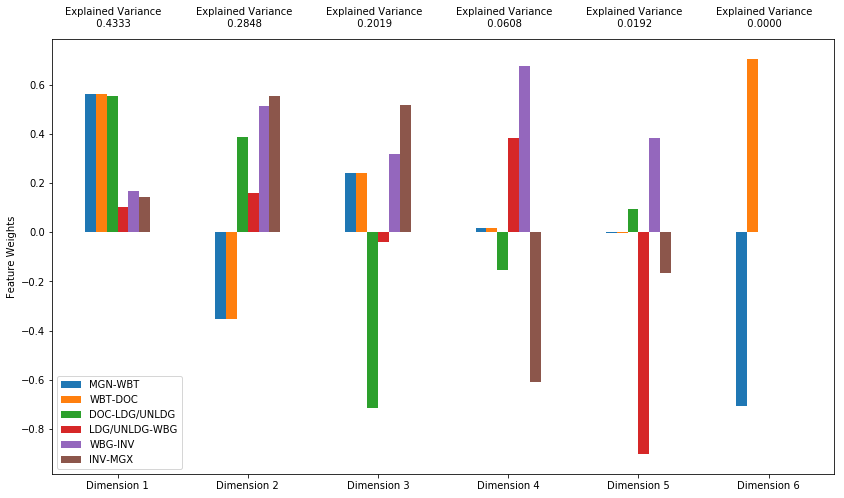

In [33]:
pca_results(X_new_zones_1, pca_zone_1)

,Explained Variance,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
Dimension 1,0.5597,0.0499,0.0499,0.7390,0.2400,0.2892,0.5547
Dimension 2,0.2549,0.0532,0.0532,-0.3978,-0.2973,-0.3063,0.8087
Dimension 3,0.1084,0.4384,0.4384,0.4106,-0.4441,-0.4609,-0.1935
Dimension 4,0.0748,0.5499,0.5499,-0.3552,0.3778,0.3545,0.0260
Dimension 5,0.0022,0.0129,0.0129,-0.0293,-0.7170,0.6960,-0.0160
Dimension 6,0.0000,0.7071,-0.7071,0.0000,0.0000,-0.0000,0.0000


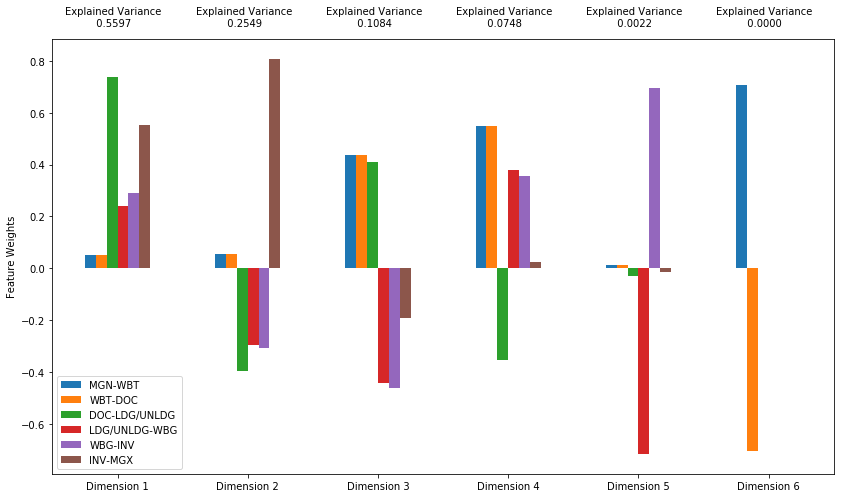

In [34]:
pca_results(X_new_zones_2, pca_zone_2)

,Explained Variance,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
Dimension 1,0.4894,0.1416,0.1416,0.6115,0.5171,0.5585,0.0817
Dimension 2,0.2565,-0.2321,-0.2321,-0.6909,0.4408,0.4692,-0.0230
Dimension 3,0.1340,0.6249,0.6249,-0.3401,0.0715,0.0349,-0.3115
Dimension 4,0.1091,0.1885,0.1885,-0.1820,-0.0434,0.0056,0.9455
Dimension 5,0.0109,0.0101,0.0101,-0.0066,-0.7289,0.6831,-0.0429
Dimension 6,0.0000,0.7071,-0.7071,-0.0000,0.0000,-0.0000,-0.0000


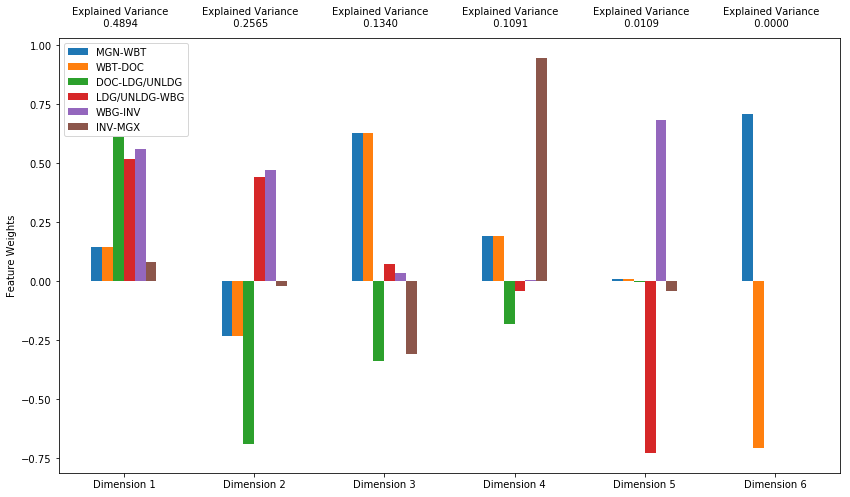

In [35]:
pca_results(X_new_zones_3, pca_zone_3)

,Explained Variance,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX
Dimension 1,0.3360,-0.1669,-0.1669,0.0688,0.2593,0.7733,0.5238
Dimension 2,0.3234,0.4449,0.4449,-0.7287,-0.0376,0.1018,0.2477
Dimension 3,0.2056,0.5217,0.5217,0.6194,0.1749,0.1781,-0.0984
Dimension 4,0.1053,0.0440,0.0440,0.2838,-0.5257,-0.3248,0.7306
Dimension 5,0.0297,0.0103,0.0103,0.0055,-0.7902,0.5044,-0.3478
Dimension 6,0.0000,-0.7071,0.7071,0.0000,-0.0000,0.0000,-0.0000


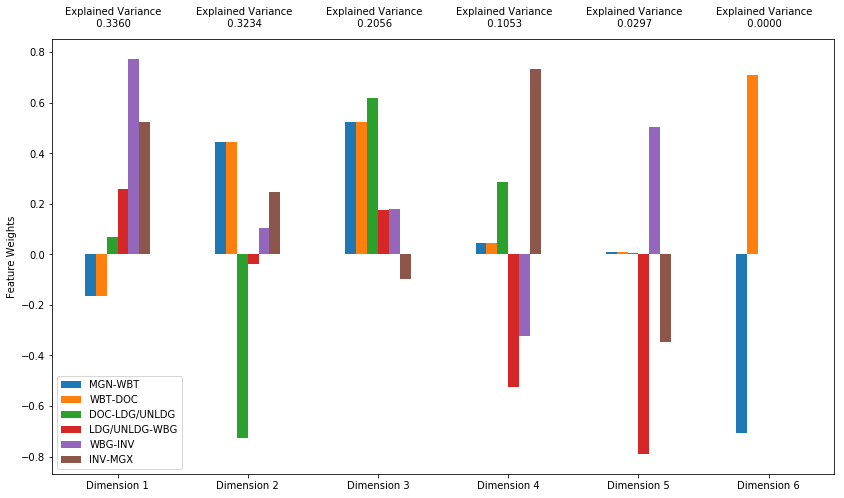

In [36]:
pca_results(X_new_zones_4, pca_zone_4)

In [37]:
X.head()
X_with_date = X
X_with_date["In Date"] = data['In Date']
X_with_date.head()

,Gate Entry No,Truck No,In Time,MGN-WBT,WBT-DOC,DOC-LDG/UNLDG,LDG/UNLDG-WBG,WBG-INV,INV-MGX,In Date
0,6.100008e+09,MH,30,42.0,42.0,787.0,193.000000,253.000000,129.0,01-06-18
1,6.100009e+09,GJ,36,39.0,39.0,738.0,144.000000,151.000000,215.0,01-06-18
2,6.100008e+09,UP,80,7.0,7.0,1148.0,553.000000,562.000000,201.0,01-06-18
3,2.000024e+08,GJ,359,95.0,95.0,183.0,60.875239,60.875239,46.0,01-06-18
4,2.000024e+08,GJ,361,94.0,94.0,166.0,60.875239,60.875239,36.0,01-06-18


In [38]:
y_with_date= X_with_date
y_with_date = y_with_date["In Date"]
y_with_date.head()
y_with_date_new = y_with_date.value_counts()
y_with_date_new

02-06-18    180
01-06-18    162
09-06-18    162
12-06-18    160
08-06-18    151
03-06-18    147
14-06-18    147
07-06-18    146
06-06-18    142
13-06-18    136
04-06-18    132
15-06-18    129
05-06-18    125
11-06-18    108
10-06-18     82
Name: In Date, dtype: int64

In [39]:
y_with_date_new = X_with_date.drop(['Gate Entry No', 'Truck No', 'In Time', 'MGN-WBT', 'WBT-DOC', 'DOC-LDG/UNLDG', 'LDG/UNLDG-WBG','WBG-INV', 'INV-MGX'], axis = 1)

y_with_date_new['In Date'].value_counts()
y_un_dates = y_with_date_new['In Date'].unique()
s1 = pd.Series(y_un_dates, name = 'Date')
s2 = [162, 180, 147, 132, 125, 142, 146, 151, 162, 82, 108, 160, 136, 147, 129]
data_date = pd.DataFrame({'Date' :  s1, 'Trucks' : s2})

data_date

,Date,Trucks
0,01-06-18,162
1,02-06-18,180
2,03-06-18,147
3,04-06-18,132
4,05-06-18,125
5,06-06-18,142
6,07-06-18,146
7,08-06-18,151
8,09-06-18,162
9,10-06-18,82


In [40]:
import datetime
datetime.date(year = 2018, month = 6, day = 1).weekday()

4

In [41]:
def fx(x):
    x = x.split('-')
    return datetime.date(year = int(x[2]), month = int(x[1]), day = int(x[0])).weekday()

def fg(x):
    x = x.split('-')
    return x[1]
data_date["Day"] = data_date["Date"].apply(lambda x: fx(x))
data_date['Month'] = data_date['Date'].apply(lambda x: fg(x))
data_date

,Date,Trucks,Day,Month
0,01-06-18,162,4,06
1,02-06-18,180,5,06
2,03-06-18,147,6,06
3,04-06-18,132,0,06
4,05-06-18,125,1,06
5,06-06-18,142,2,06
6,07-06-18,146,3,06
7,08-06-18,151,4,06
8,09-06-18,162,5,06
9,10-06-18,82,6,06


In [42]:
y_with_date = data_date['Trucks']

In [43]:
X_date_final = data_date
X_date_final = X_date_final.drop(['Trucks', 'Date'], axis = 1)
X_date_final

,Day,Month
0,4,06
1,5,06
2,6,06
3,0,06
4,1,06
5,2,06
6,3,06
7,4,06
8,5,06
9,6,06


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X_date_final, y_with_date, test_size=0.2, random_state=42)

In [45]:
reg = DecisionTreeRegressor(max_depth = 3)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
pred_1 = reg.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_1)

39.583333333333336

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor()
reg2.fit(X_train, y_train)
pred2 = reg2.predict(X_test)
mean_absolute_error(y_test, pred2)
print (y_test)
print (pred2)

9      82
11    160
0     162
Name: Trucks, dtype: int64
[157.8        120.3        140.36666667]
